### Import packages

In [ ]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

from geneticalgorithm import geneticalgorithm as ga
import pyswarms as ps
from scipy.optimize import dual_annealing

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Project

Apply three grid search algorithms (Genetic Algorithm, Particle Swarm Optimization, and Simulated Annealing) to determine the best choice of hyperparameters for Elastic Net and Support Vector Regressor methods. 

For Elastic Net, determine the best alpha and l1_ratio. For SVR, determine the best combination of epsilon and C values. The metric for decision is a 10-fold cross-validated MSE (external validation).

# Data preprocessing

In [ ]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/DATA310/data/AirI.csv')
data

,3.4482,0.0013136,0.15747,0.6883,0.15292,0,0.1,0.096603,0.52135,0.38205,...,-2.9459,0.21996,-0.69045,0.24044,-0.25864,1.3387,0.11482,-0.43046,0.82309,1.5435
0,3.3019,0.188490,0.553190,0.258290,0.000031,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.22680,-0.428570,0.74992,-0.111920,1.583000,0.88565,-0.053227,0.67796,-1.72010,-0.550510
1,2.2894,0.052169,0.438520,0.494030,0.015282,0.000000,0.00000,0.000000,0.00000,0.394840,...,1.15790,0.010118,0.73593,1.356000,0.057821,-1.44140,1.581800,1.25420,1.02540,-1.018900
2,2.6207,0.000000,0.000000,0.004213,0.109340,0.493440,0.39300,0.000000,0.00000,0.578540,...,-0.69767,1.577800,0.54899,-0.780420,1.136700,-0.84240,0.993120,-0.44576,-0.78778,-1.490900
3,2.8439,0.000000,0.000000,0.019504,0.260470,0.549860,0.17016,0.010568,0.30520,0.670460,...,-1.49170,-0.688640,-0.69924,0.360740,-0.685860,-0.76161,-0.354560,0.83093,-0.27100,0.388610
4,2.6684,0.331420,0.518940,0.147120,0.000000,0.000000,0.00000,0.000000,0.00000,0.244070,...,-0.35923,-0.029500,0.54853,1.929200,1.063400,1.82900,0.142320,-0.46403,-2.18420,-1.967500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2.4101,0.301000,0.021904,0.000415,0.000000,0.000000,0.00000,0.000000,0.00000,0.051206,...,-1.56660,-1.097100,2.77450,0.679850,-0.292200,0.13691,-0.439250,-1.56390,0.29082,0.023485
106,3.1072,0.000734,0.138890,0.688740,0.171630,0.000000,0.00000,0.171260,0.54746,0.280340,...,-0.32440,-1.341500,-1.51650,0.870840,1.023700,0.26581,0.174520,-0.29601,1.13600,0.217580
107,2.4101,0.001095,0.151180,0.688720,0.159000,0.000000,0.00000,0.000000,0.00000,0.194760,...,-0.49572,-0.832130,0.52386,0.189400,1.115700,-0.14259,-0.481300,-1.58790,-0.23976,1.717000
108,2.6207,0.117370,0.526200,0.354590,0.001831,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.87353,0.063740,0.20128,0.090828,0.338310,-1.23960,-1.197600,-0.35008,0.59517,0.803430


In [ ]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [ ]:
print(X.shape)
print(y.shape)

(110, 511)
(110,)


# Hyperparameters for Elastic Net

Determine best combination of alpha and L1 ratio hyperparameters using grid search algorithms.

## Genetic Algorithm

In [ ]:
def objective_ga(h): 
  a = h[0] #alpha
  l = h[1] #L1 ratio
  kf = KFold(n_splits=10, shuffle=True, random_state=123)
  model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)
  scale = StandardScaler()
  PE = []
  # cross-validation
  for idxtrain, idxtest in kf.split(X): 
    xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    xtrain = scale.fit_transform(xtrain)
    xtest = X[idxtest]
    ytest = y[idxtest]
    xtest = scale.transform(xtest)
    model.fit(xtrain,ytrain)
    PE.append(MSE(ytest,model.predict(xtest)))
    PE.append(np.mean(PE))
  return np.mean(PE)

 The best solution found:
 [0.06845592 0.89554244]

 Objective function:
 0.23802615248449346


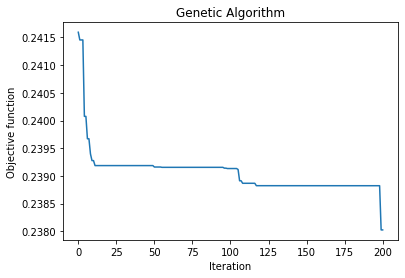

In [ ]:
varbound=np.array([[0,3],[0,1]])
model=ga(function=objective_ga,dimension=2,variable_type='real',variable_boundaries=varbound)
model.run()

With the genetic algorithm, the best alpha value is 0.0684 and the best L1 ratio is 0.8955 for Elastic Net regression.

##Partical Swarm Optimization

In [ ]:
def objective_pso1(h):
  scale = StandardScaler()
  kf = KFold(n_splits=10, shuffle=True, random_state=123)
  output = []
  for i in range(h.shape[0]):
    a = h[i,0]
    l = h[i,1]
    model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)
    PE = []
    for idxtrain, idxtest in kf.split(X):
      xtrain = X[idxtrain]
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = X[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
    output.append(np.mean(PE))
  return output

In [ ]:
max = np.array([3,1])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso1, iters=100)

2022-08-01 01:03:13,151 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.269
2022-08-01 01:04:47,297 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.2692349141516045, best pos: [0.34008191 0.16331241]


With PSO, the best alpha value is 0.3401 and the best L1 ratio is 0.1633 for Elastic Net regression.

## Simulated Annealing

In [ ]:
def objective_anneal(h): 
  scale = StandardScaler()
  kf = KFold(n_splits=10, shuffle=True, random_state=123)
  a = h[0] #alpha
  l = h[1] #L1 ratio
  model = ElasticNet(alpha=a,l1_ratio=l,max_iter=5000)
  PE = []
  # cross-validation
  for idxtrain, idxtest in kf.split(X): 
    xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    xtrain = scale.fit_transform(xtrain)
    xtest = X[idxtest]
    ytest = y[idxtest]
    xtest = scale.transform(xtest)
    model.fit(xtrain,ytrain)
    PE.append(MSE(ytest,model.predict(xtest)))
    PE.append(np.mean(PE))
  return np.mean(PE)

In [ ]:
lw = [0.0001,0.0001]
up = [3,0.9999]
ret = dual_annealing(objective_anneal, bounds=list(zip(lw, up)))

In [ ]:
ret.x

array([0.05919258, 0.9999    ])

In [ ]:
ret

     fun: 0.23591662565127133
 message: ['Maximum number of iteration reached']
    nfev: 4580
    nhev: 0
     nit: 1000
    njev: 193
  status: 0
 success: True
       x: array([0.05919258, 0.9999    ])

With simulated annealing, the best alpha value is 0.0592 and the best L1 ratio is 0.9999 for Elastic Net regression.

# Hyperparameters for Support Vector Regression

Determine best combination of $\epsilon$ and $\\C$ hyperparameters using grid search algorithms.

##Genetic Algorithm

In [ ]:
def objective_ga1(h): 
  eps = h[0] #epsilon
  c = h[1] #C
  model = SVR(epsilon=eps,C=c,max_iter=5000)
  kf = KFold(n_splits=10, shuffle=True, random_state=123)
  scale = StandardScaler()
  PE = []
  # cross-validation
  for idxtrain, idxtest in kf.split(X): 
    xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    xtrain = scale.fit_transform(xtrain)
    xtest = X[idxtest]
    ytest = y[idxtest]
    xtest = scale.transform(xtest)
    model.fit(xtrain,ytrain)
    PE.append(MSE(ytest,model.predict(xtest)))
    PE.append(np.mean(PE))
  return np.mean(PE)

 The best solution found:
 [0.00502684 0.99914842]

 Objective function:
 0.3670934434085454


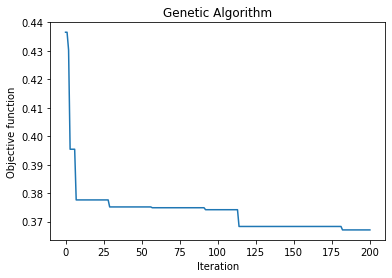

In [ ]:

varbound=np.array([[0,3],[0,1]])
model=ga(function=objective_ga1,dimension=2,variable_type='real',variable_boundaries=varbound)
model.run()

With the genetic algorithm, the best epsilon value is 0.0050 and the best $C$ value is 0.9991 for support vector regression.

## Partical Swarm Optimization

In [ ]:
def objective_pso2(h):
  scale = StandardScaler()
  kf = KFold(n_splits=10, shuffle=True, random_state=123)
  output = []
  for i in range(h.shape[0]):
    eps = h[i,0]
    c = h[i,1]
    model = SVR(epsilon=eps,C=c)
    PE = []
    for idxtrain, idxtest in kf.split(X):
      xtrain = X[idxtrain]
      ytrain = y[idxtrain]
      xtrain = scale.fit_transform(xtrain)
      xtest = X[idxtest]
      ytest = y[idxtest]
      xtest = scale.transform(xtest)
      model.fit(xtrain,ytrain)
      PE.append(MSE(ytest,model.predict(xtest)))
    output.append(np.mean(PE))
  return output

In [ ]:
max = np.array([3,4])
min = np.array([0,0])
bounds = (min, max)
options = {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_pso2, iters=100)

2022-08-01 01:49:43,882 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.25, 'c2': 0.25, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.386
2022-08-01 01:51:20,018 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3860710888207458, best pos: [0.03145757 3.07857203]


With PSO, the best epsilon value is 0.0314 and the best $C$ value is 3.0785 for support vector regression.

##Simulated Annealing

In [ ]:
def objective_anneal2(h): 
  eps = h[0] #epsilon
  c = h[1] #C
  model = SVR(epsilon=eps,C=c,max_iter=5000)
  kf = KFold(n_splits=10, shuffle=True, random_state=123)
  scale = StandardScaler()
  PE = []
  # cross-validation
  for idxtrain, idxtest in kf.split(X): 
    xtrain = X[idxtrain]
    ytrain = y[idxtrain]
    xtrain = scale.fit_transform(xtrain)
    xtest = X[idxtest]
    ytest = y[idxtest]
    xtest = scale.transform(xtest)
    model.fit(xtrain,ytrain)
    PE.append(MSE(ytest,model.predict(xtest)))
    PE.append(np.mean(PE))
  return np.mean(PE)


In [ ]:
lw = [0.0001,0.0001]
up = [3,0.9999]
ret = dual_annealing(objective_anneal2, bounds=list(zip(lw, up)))

In [ ]:
ret

     fun: 0.3661943085454129
 message: ['Maximum number of iteration reached']
    nfev: 4010
    nhev: 0
     nit: 1000
    njev: 3
  status: 0
 success: True
       x: array([1.000e-04, 9.999e-01])

In [ ]:
ret.x

array([1.000e-04, 9.999e-01])

With simulated annealing, the best epsilon value is 0.0001 and the best $C$ value is 0.9999 for support vector regression.